# Задание 10.

Вам предоставлен набор данных по качеству воздуха в китайских городах в виде csv файлов.
Основная метрика, которая показывает качество воздуха - PM25(<a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740125/'>подробнее о PM25</a>), указана в колонках, которые начинаются на PM_.
Остальные столбцы содержат либо данные о времени, в которое были произведены измерения, либо данные о погоде в этот момент. DEWP - точка росы, HUMI - влажность, PRES - давление, TEMP - температура, cbwd - направление ветра, Iws - его скорость, precipation - осадки, Iprec - накопленные осадки.

Для выполнения задания необходимо ответить на вопросы по данным, заполнив ячейки ноутбука. Сам ноутбук необходимо выложить в виде отдельного репозитория на github. Ссылку для клонирования репозитория необходимо приложить в решение задания.

In [174]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import scipy as sp

## 1. Загрузите в виде DataFrame набор данных по качеству воздуха Пекина
Ссылка на набор данных: https://disk.yandex.ru/d/1UKJoV1ULW1NLQ

In [109]:
data = pd.read_csv('BeijingPM20100101_20151231.csv',index_col = 'No')
data.head(5)

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,,,,,
1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [110]:
data = data.sort_values(by = ['year','month','day','hour'])


## 2. Сколько всего строк находится в наборе данных?

In [111]:
data.shape[0]

52584

## 3. Сколько измерений уровня загрязнения воздуха находится в наборе данных?

In [112]:
data_clear_na = data.dropna(subset = ['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'])
data_clear_na.shape[0]

19380

## 4. Введите столбец среднего качества воздуха PM_mean с усреднением показаний со всех станций слежения.

In [113]:
data['PM_mean'] = data.loc[:,['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].mean(axis = 1,skipna = True)

## 5. Какое направление ветра преобладает в Пекине?

In [114]:
data['cbwd'].describe()['top']

'SE'

## 6. В какой день качество воздуха является наихудшим(самая большая концентрация частиц)? Вывести дату в типе данных datetime стандартной библиотеки Python.

In [115]:
bad_day = data.loc[data['PM_mean'] == data['PM_mean'].max(),['year','month','day','hour',]]
bad_day
datetime.datetime(year = bad_day.year,month = bad_day.month,day = bad_day.day,hour = bad_day.hour)

<ipython-input-115-96d621fc8eb7>:3: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  datetime.datetime(year = bad_day.year,month = bad_day.month,day = bad_day.day,hour = bad_day.hour)


datetime.datetime(2012, 1, 23, 0, 0)

## 7. Какой из сезонов в Пекине в среднем наименее неблагоприятный для легких за последние 2 года наблюдений?

In [116]:
last_2_year = data.loc[data.year >= 2014,['season','PM_mean']]
last_2_year
PM_mean_season = last_2_year.groupby(by = 'season').mean()
PM_mean_season.idxmax()

PM_mean    4
dtype: int64

## 8. Коррелирует ли влажность с качеством воздуха?
Можно воспользоваться корреляцией Пирсона из numpy, а также встроенными функциями Pandas.

In [117]:
data.loc[:,['PM_mean','HUMI']].corr()

,PM_mean,HUMI
PM_mean,1.000000,0.424115
HUMI,0.424115,1.000000


Между параметрами влажности и качеством воздуха присутсвует слабая корреляция 0,424

## 9. Какой из сезонов в Пекине самый дождливый(в среднем по накоплению осадков)?

In [118]:
data.loc[:,['season','Iprec']].groupby(by = 'season').mean().idxmax()

Iprec    3
dtype: int64

## 10. Становится ли качество воздуха во время дождя лучше, чем оно было сразу перед дождем?

In [156]:
data_rain = pd.DataFrame(columns = ['in the rain','before the rain'])
in_rain = []
for i in data.index: 
    
    if data.precipitation[i] == 0 and len(in_rain) == 0:
        PM_before_rain = data.PM_mean[i]
    
    if data.precipitation[i] == 0 and len(in_rain) != 0:
        data_rain = data_rain.append({'in the rain':np.mean(in_rain),'before the rain':PM_before_rain},
                                     ignore_index = True)
        PM_before_rain = data.PM_mean[i]
        in_rain = []
    
    if data.precipitation[i] > 0:
        in_rain.append(data.PM_mean[i])

data_rain.head()
        
    
    

,in the rain,before the rain
0,79.050000,90.0
1,39.000000,29.0
2,82.777778,15.0
3,68.142857,76.0
4,43.000000,65.0


<AxesSubplot:>

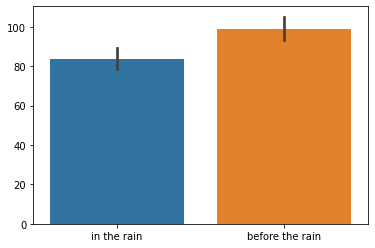

In [176]:
sns.barplot(data = data_rain)

In [171]:
data_rain = data_rain.dropna()

In [177]:
sp.stats.normaltest(data_rain.iloc[:,0])

NormaltestResult(statistic=180.3963429114445, pvalue=6.720968485652669e-40)

In [178]:
sp.stats.normaltest(data_rain.iloc[:,1])

NormaltestResult(statistic=167.78719615473696, pvalue=3.676827777368958e-37)

In [173]:
sp.stats.kruskal(data_rain.iloc[:,0],data_rain.iloc[:,1])

KruskalResult(statistic=12.673305455615427, pvalue=0.0003709132201210257)

# Анализ показал, что показатель PM во время дождя ниже, чем непосредственно перед ним. Поэтому можно сказать, что во время дождя качество воздуха улучшается, по сравнению с качеством перед дождем.